NIGERIAN GRADUATES AND EMPLOYMENT RATE....

Am olanipekun temitope and this is my prediction analysis and EDA as regards the dataset..

# explaining the datasets

The datasets was culled by Stutern. And the summary of the data origin is as follows
A total of 5,219 Nigerian graduates completed the survey.
These graduates completed their degree within the last 5 years (2013 - 2017).
The survey was live from February 8 through May 15, 2018.
The survey was hosted using Google Forms and Stutern recruited respondents via email and social media sites.
To account for graduates in marginalized locations, tracking officers from BudgITCo conducted the offline version in 5 states (Edo, Enugu, Ibadan, Imo and Kaduna State).
We removed about 600 responses that were incomplete from the offline version of the survey before we arrived at 5,219 total responses.
Not every question was shown to every respondent, as some questions were specifically for those who are employed or other cases as it may be.

..SO,we want to find out some basic informations about the dataset,its going to really open our eyes to many things

realistically,we have to know schools that are really doing a lot for their students

and also know how the employment rate is either increasing or decreasing....

we are also going to know why companies are employing graduates


and we would love to know those that are employed ...unemployed..and self employed...

pls take note of everything i have stated...

as we move along in this valley of analysis....

In [1]:
#import neccesary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns




from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('NIGgrad.csv')
df.head()

,Timestamp,What is your gender,Year of graduation,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,How many jobs have you had since graduation including your current one?,Have you completed your NYSC?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",...,What currency are you currently paid in?,Approximately how many hours a day do you currently work?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
0,2/8/2018 9:05:23,Male,2013,Electrical & Electronic Engineering,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),3,NaN,NaN,...,Naira,8.0,No one thing was important,Internship,No,Bus,Yes: From my first job,No,No,"Critical thinking skills, Ability to solve com..."
1,2/15/2018 12:11:32,Male,2014,Psychology,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),2,Yes,2017.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,Internship,No,BRT,No: From my current job,Strongly Disagree,Agree,"Critical thinking skills, Ability to solve com..."
2,2/15/2018 13:47:10,Female,2013,Economics,"Bells University of Technology, Otta",Bachelor's degree,Working full time (paid employment),2,Yes,NaN,...,Naira,14.0,The subject(s) I studied,Employer's website,No,Uber/Taxify/Taxi services,No: From my current job,Disagree,Agree,"Ability to work with others, Written communica..."
3,2/16/2018 13:01:34,Male,2017,Mass Communication (Communication and Language...,"Bowen University, Iwo",Master's degree,Self-employed/freelance/entrepreneur,0,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/16/2018 13:18:03,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills


In [3]:
#we would love to rename the columns,,basically because they are too long and they can cause lenghty arrangements
old_colms = list(df.columns.values)


new_colms=['Time','Gender','Grad_Y','Course','School','Highest_Q','Current_Stat','No_Of_Jobs','NYSC_cert','NYSC_Year',
             'Through_NYSC','FJob_Level','FJob_Role','FJob_sector','FJ_Income_Level','FJ_Required_HQ','Reason_FJ',
             'PJ_level', 'PJ_Role','PJ_Sector','PJ_Income','PJ_Required_HQ','Reason_PJ',
            'Best_Employer','Reason_Best_Employer','Most_PS','Currency','Job_Hours','Most_Important_Qualification',
             'Findout_Job','Worked_For_Employer',
            'Transport_TW','Rent_Buy','CP_Job','CP_Further_Studies','Skills_Prepared']
colms_dict = dict(zip(old_colms,new_colms))
df1 = df.rename(columns=colms_dict)



In [4]:
df1.head()

,Time,Gender,Grad_Y,Course,School,Highest_Q,Current_Stat,No_Of_Jobs,NYSC_cert,NYSC_Year,...,Currency,Job_Hours,Most_Important_Qualification,Findout_Job,Worked_For_Employer,Transport_TW,Rent_Buy,CP_Job,CP_Further_Studies,Skills_Prepared
0,2/8/2018 9:05:23,Male,2013,Electrical & Electronic Engineering,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),3,NaN,NaN,...,Naira,8.0,No one thing was important,Internship,No,Bus,Yes: From my first job,No,No,"Critical thinking skills, Ability to solve com..."
1,2/15/2018 12:11:32,Male,2014,Psychology,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),2,Yes,2017.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,Internship,No,BRT,No: From my current job,Strongly Disagree,Agree,"Critical thinking skills, Ability to solve com..."
2,2/15/2018 13:47:10,Female,2013,Economics,"Bells University of Technology, Otta",Bachelor's degree,Working full time (paid employment),2,Yes,NaN,...,Naira,14.0,The subject(s) I studied,Employer's website,No,Uber/Taxify/Taxi services,No: From my current job,Disagree,Agree,"Ability to work with others, Written communica..."
3,2/16/2018 13:01:34,Male,2017,Mass Communication (Communication and Language...,"Bowen University, Iwo",Master's degree,Self-employed/freelance/entrepreneur,0,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/16/2018 13:18:03,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills


In [5]:
#shape of the datasets
df1.shape

(5219, 36)

In [6]:
#information of the datasets
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Time                          5219 non-null   object 
 1   Gender                        5219 non-null   object 
 2   Grad_Y                        5219 non-null   int64  
 3   Course                        5219 non-null   object 
 4   School                        5219 non-null   object 
 5   Highest_Q                     5219 non-null   object 
 6   Current_Stat                  5219 non-null   object 
 7   No_Of_Jobs                    5219 non-null   int64  
 8   NYSC_cert                     5218 non-null   object 
 9   NYSC_Year                     4278 non-null   float64
 10  Through_NYSC                  5218 non-null   object 
 11  FJob_Level                    1656 non-null   object 
 12  FJob_Role                     1654 non-null   object 
 13  FJo

In [7]:
#checking if the datasets has missing values
#since it does we would need to clean it
df1.isnull().sum()

Time                               0
Gender                             0
Grad_Y                             0
Course                             0
School                             0
Highest_Q                          0
Current_Stat                       0
No_Of_Jobs                         0
NYSC_cert                          1
NYSC_Year                        941
Through_NYSC                       1
FJob_Level                      3563
FJob_Role                       3565
FJob_sector                     3563
FJ_Income_Level                 3563
FJ_Required_HQ                  3563
Reason_FJ                       3563
PJ_level                        1787
PJ_Role                         1788
PJ_Sector                       1787
PJ_Income                       1787
PJ_Required_HQ                  1788
Reason_PJ                       1787
Best_Employer                   2261
Reason_Best_Employer            2110
Most_PS                         1922
Currency                        1787
J

In [8]:
#we have dropped the NA values 
df11 = df1.dropna()
df11.head()


,Time,Gender,Grad_Y,Course,School,Highest_Q,Current_Stat,No_Of_Jobs,NYSC_cert,NYSC_Year,...,Currency,Job_Hours,Most_Important_Qualification,Findout_Job,Worked_For_Employer,Transport_TW,Rent_Buy,CP_Job,CP_Further_Studies,Skills_Prepared
4,2/16/2018 13:18:03,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills
5,2/16/2018 16:44:18,Male,2015,Electrical & Electronic Engineering,University of Benin,Bachelor's degree,Working full time (paid employment),2,No,2013.0,...,Naira,10.0,Capacity,Social media/professional networking sites,No,Car,No: From my current job,Agree,Agree,"Ability to work with others, Knowledge of the ..."
6,2/19/2018 7:24:05,Male,2013,Economics,"Bowen University, Iwo",Higher National Diploma (HND),Working full time (paid employment),4,Yes,2016.0,...,Naira,8.0,Don't know,"University/polytechnic (e.g. Careers Service, ...",Yes: during my higher education study,Commercial Vehicles,No: From my current job,Strongly Disagree,Strongly Disagree,"Critical thinking skills, Ability to work with..."
8,2/19/2018 8:53:52,Female,2017,Industrial Relations and Personnel Management,Covenant University Ota,Bachelor's degree,Youth Corper (NYSC),2,Ongoing,2018.0,...,Naira,9.0,The subject(s) I studied,"Personal contacts, including family and friends",No,Keke Marwa/Napep/Tricycle,No,Agree,Agree,Ability to work with others
10,2/19/2018 9:19:58,Male,2015,Economics,University of Ibadan,Bachelor's degree,Due to start a job in the next month/developin...,3,Yes,2016.0,...,Naira,9.0,No one thing was important,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Strongly Disagree,Strongly Disagree,"Critical thinking skills, Written communicatio..."


In [9]:
#we had to check to confirm,and its clean
df11.isnull().sum()

Time                            0
Gender                          0
Grad_Y                          0
Course                          0
School                          0
Highest_Q                       0
Current_Stat                    0
No_Of_Jobs                      0
NYSC_cert                       0
NYSC_Year                       0
Through_NYSC                    0
FJob_Level                      0
FJob_Role                       0
FJob_sector                     0
FJ_Income_Level                 0
FJ_Required_HQ                  0
Reason_FJ                       0
PJ_level                        0
PJ_Role                         0
PJ_Sector                       0
PJ_Income                       0
PJ_Required_HQ                  0
Reason_PJ                       0
Best_Employer                   0
Reason_Best_Employer            0
Most_PS                         0
Currency                        0
Job_Hours                       0
Most_Important_Qualification    0
Findout_Job   

In [10]:
df11.describe().style.highlight_max(color = 'yellow').highlight_min(color = 'blue')
#this is showing the general statistics and also using the colours to denote the max and min values!!!!!

,Grad_Y,No_Of_Jobs,NYSC_Year,Job_Hours
count,1229.000000,1229.000000,1229.000000,1229.000000
mean,2014.720911,2.500407,2016.176566,9.081774
std,1.236416,0.852879,1.428162,2.545919
min,2013.000000,2.000000,2013.000000,0.000000
25%,2014.000000,2.000000,2015.000000,8.000000
50%,2015.000000,2.000000,2016.000000,9.000000
75%,2016.000000,3.000000,2017.000000,10.000000
max,2017.000000,10.000000,2019.000000,24.000000


In [11]:
corr = df11.corr()

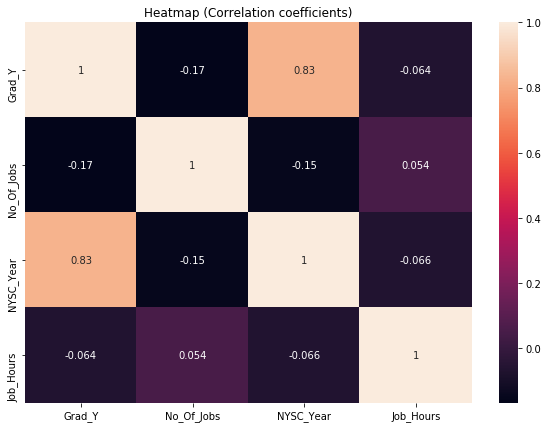

In [12]:
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot = True, color = 'yellow')
plt.title('Heatmap (Correlation coefficients)')
plt.show()

There is a good correlation relatioship between nysc year and graduating year

<Figure size 720x720 with 0 Axes>

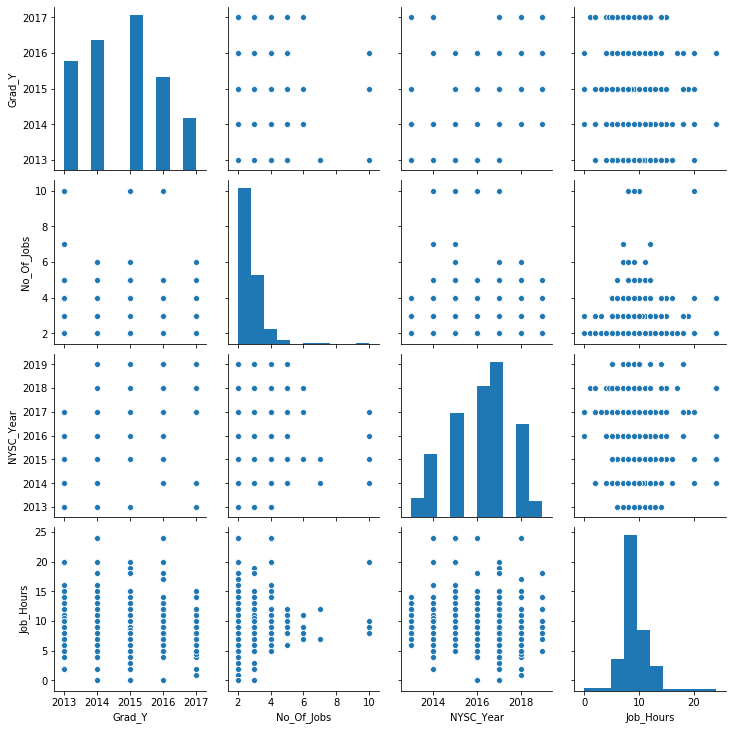

<Figure size 720x720 with 0 Axes>

In [13]:
#THIS are pairplots of the various features...
sns.pairplot(df11)
plt.figure(figsize=(10,10))

checking the unique values of the dataset

In [14]:
df11.nunique()

Time                            1225
Gender                             2
Grad_Y                             5
Course                           109
School                           110
Highest_Q                          6
Current_Stat                      10
No_Of_Jobs                         7
NYSC_cert                          3
NYSC_Year                          7
Through_NYSC                       3
FJob_Level                         5
FJob_Role                         42
FJob_sector                       30
FJ_Income_Level                    7
FJ_Required_HQ                     4
Reason_FJ                          9
PJ_level                           6
PJ_Role                           43
PJ_Sector                         30
PJ_Income                          7
PJ_Required_HQ                     4
Reason_PJ                         55
Best_Employer                    776
Reason_Best_Employer              72
Most_PS                           30
Currency                           2
J

we would love to check the unique values of the columns of our dataset

beacuse they are very important

In [15]:
df11.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df11.Grad_Y.unique()

array([2013, 2015, 2017, 2016, 2014], dtype=int64)

In [17]:
df11.Highest_Q.unique()

array(["Bachelor's degree", 'Higher National Diploma (HND)',
       "Master's degree", 'MBA degree', 'PhDs/Doctorate Degree',
       'Ordinary National Diploma (OND)'], dtype=object)

In [18]:
df11.School.unique()

array(['Ekiti State University', 'University of Benin',
       'Bowen University, Iwo', 'Covenant University Ota',
       'University of Ibadan', 'Obafemi Awolowo University,Ile-Ife',
       'Babcock University,Ilishan-Remo',
       'Federal University of Technology, Minna.',
       'Ladoke Akintola University of Technology, Ogbomoso',
       'Adekunle Ajasin University, Akungba.',
       'Federal University of Technology, Akure',
       'University of Nigeria, Nsukka', 'Madonna University, Okija',
       'Modibbo Adama University of Technology, Yola',
       'University of Maiduguri', 'Olabisi Onabanjo University Ago-Iwoye',
       'Anambra State University of Science & Technology, Uli',
       'Delta State University Abraka', 'University of Uyo',
       "Redeemer's University, Mowe", 'Osun State University, Oshogbo',
       'University of Agriculture, Abeokuta.',
       'Imo State University, Owerri', 'University of Ilorin',
       'University of Lagos', 'Ebonyi State University, Aba

In [19]:
df11.Gender.value_counts()

Male      641
Female    588
Name: Gender, dtype: int64

So from the above value counts,we observe the genders in the dataset 

which comprises of male and female with their total number....
MALE:641
FEMALE:588

In [20]:
df11.Grad_Y.value_counts()

2015    354
2014    296
2013    248
2016    213
2017    118
Name: Grad_Y, dtype: int64

In [21]:
df11.Highest_Q.value_counts

<bound method IndexOpsMixin.value_counts of 4                   Bachelor's degree
5                   Bachelor's degree
6       Higher National Diploma (HND)
8                   Bachelor's degree
10                  Bachelor's degree
                    ...              
5196    Higher National Diploma (HND)
5204                Bachelor's degree
5208                Bachelor's degree
5211                Bachelor's degree
5217    Higher National Diploma (HND)
Name: Highest_Q, Length: 1229, dtype: object>

In [22]:
df11.Findout_Job.unique()

array(['Personal contacts, including family and friends',
       'Social media/professional networking sites',
       'University/polytechnic (e.g. Careers Service, lecturer, website)',
       'Recruitment agency/Online job site', 'Internship',
       'Media (e.g. newspaper/magazine advertisement)',
       "Employer's website"], dtype=object)

In [23]:
df11.Findout_Job.value_counts()

Personal contacts, including family and friends                     500
Recruitment agency/Online job site                                  255
Social media/professional networking sites                          251
Media (e.g. newspaper/magazine advertisement)                        93
Internship                                                           53
Employer's website                                                   43
University/polytechnic (e.g. Careers Service, lecturer, website)     34
Name: Findout_Job, dtype: int64

This shows the value counts of  how they found out about the jobs,from here we can see that personal contacts,

including family and friends actually has the highest number by which people found their jobs..

This tells you to stay close to family and friends....

In [24]:
df11.Currency.unique()

array(['Naira', 'Foreign currency'], dtype=object)

In [25]:
df11.Currency.value_counts()

Naira               1207
Foreign currency      22
Name: Currency, dtype: int64

From the value counts of currency we can se clearly that those earning naira are more than those earning 

foreign currency.....

In [26]:
df11.Course.unique()

array(['Statistics', 'Electrical & Electronic Engineering', 'Economics',
       'Industrial Relations and Personnel Management',
       'Banking and Finance', 'Geography', 'Computer Science',
       'Computer Engineering', 'Biochemistry', 'Business Administration',
       'Physics and Astronomy', 'Business Management',
       'English and Literary Studies', 'Mechanical Engineering',
       'Education And Geography/Physics', 'Pharmacology and Therapeutics',
       'Mass Communication (Communication and Language Arts)',
       'Political Science',
       'Vocational Teacher Education (Technical Education)',
       'Accountancy', 'Physiology',
       'Forest Resources Management (Forestry)',
       'History and International Studies',
       'Pharmaceutical Technology and Industrial Pharmacy', 'Anatomy',
       'Theatre and Film Studies', 'Foreign Languages and Literature',
       'Law', 'Agronomy', 'Production and Industrial Engineering',
       'Civil Engineering', 'Health and Physical 

In [27]:
#Value counts of the courses,shwoing the largest
df11.Course.value_counts().nlargest()

Computer Science                                        110
Economics                                                89
Accountancy                                              85
Electrical & Electronic Engineering                      57
Mass Communication (Communication and Language Arts)     53
Name: Course, dtype: int64

In [28]:
df11.Current_Stat.unique()

array(['Working full time (paid employment)', 'Youth Corper (NYSC)',
       'Due to start a job in the next month/developing a professional portfolio/creative practice',
       'Voluntary or other unpaid work or on an internship',
       'Self-employed/freelance/entrepreneur',
       'Engaged in full-time further study, training or research',
       'Taking time out to prepare for further studies, GMAT, professional exams',
       'Unemployed',
       'Engaged in part-time further study, training or research',
       'Doing something else (e.g. looking after home or family)'],
      dtype=object)

In [29]:
df11.Current_Stat.value_counts()

Working full time (paid employment)                                                           593
Youth Corper (NYSC)                                                                           164
Self-employed/freelance/entrepreneur                                                          151
Unemployed                                                                                    122
Voluntary or other unpaid work or on an internship                                             80
Engaged in full-time further study, training or research                                       38
Due to start a job in the next month/developing a professional portfolio/creative practice     37
Taking time out to prepare for further studies, GMAT, professional exams                       21
Doing something else (e.g. looking after home or family)                                       16
Engaged in part-time further study, training or research                                        7
Name: Current_Stat, 

Now for current status,Working full time(paid employment) happens to have the highest value count...

In [30]:
df11.groupby('Gender')['No_Of_Jobs'].sum()

Gender
Female    1450
Male      1623
Name: No_Of_Jobs, dtype: int64

So we see that the gender who has more jobs according to research,happens to be the MALE gender...

even though we understand that during the survey,the  male gender participated more 

In [31]:
#This is showing the schools with graduates with more jobs 
df11.groupby('School')['No_Of_Jobs'].sum().nlargest(20)

School
Covenant University Ota                               369
University of Lagos                                   292
Obafemi Awolowo University,Ile-Ife                    193
University of Ibadan                                  151
University of Benin                                   120
Babcock University,Ilishan-Remo                       114
University of Ilorin                                  108
Others (For foreign trained students)                 106
University of Agriculture, Abeokuta.                   74
Bowen University, Iwo                                  73
University of Nigeria, Nsukka                          71
Olabisi Onabanjo University Ago-Iwoye                  69
Ladoke Akintola University of Technology, Ogbomoso     68
Lagos State University Ojo, Lagos.                     68
Federal University of Technology, Owerri               57
Federal University of Technology, Akure                55
University of Port-Harcourt                            54
Ekiti S

In [32]:
#This is showing the schools with graduate with less jobs
df11.groupby('School')['No_Of_Jobs'].sum().nsmallest(20)

School
Abdu Gusau Polytechnic, Talata Mafara, Zamfara State.                                          2
Abia State Polytechnic, Aba, Abia State.                                                       2
Abraham Adesanya Polytechnic, Dogbolu/Akanran Ibadan Road, Atikori, Ijebu Igbo, Ogun State.    2
Abubakar Tafawa Balewa University, Bauchi                                                      2
Akwa Ibom State Polytechnic, Ikot Osurua, Ikot -Ekpene, Akwa Ibom State.                       2
Bolmor Polytechnic, Dugbe, Ibadan, Oyo State.                                                  2
Crawford University Igbesa                                                                     2
Delta State Polytechnic, Otefe-Oghara, Delta State                                             2
Delta State Polytechnic, Ozoro, Delta State.                                                   2
Dorben Polytechnic, Abuja, Garki, Bwari, Abuja.                                                2
Federal Polytechnic Off

C:\Users\user\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


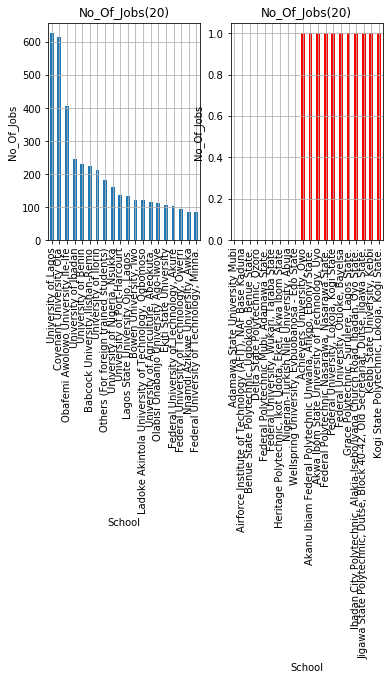

In [33]:

plt.subplot(1,2,1)
df1.groupby('School')['No_Of_Jobs'].sum().nlargest(20).plot(kind = 'bar', grid = True)
plt.title('No_Of_Jobs(20)')
plt.xlabel('School')
plt.ylabel('No_Of_Jobs')
plt.subplot(1,2,2)
df1.groupby('School')['No_Of_Jobs'].sum().nsmallest(20).plot(kind = 'bar', grid = True,
                                                                       color = 'red')
plt.title('No_Of_Jobs(20)')
plt.xlabel('School')
plt.ylabel('No_Of_Jobs')
plt.tight_layout()
plt.show()

The above information shows the schools who has  graduates with  more jobs in the populace...

its glaring that convenant university takes the lead in that aspect....

This information above shows the schools who have graduates with less  jobs.....also...

In [34]:
df11.groupby('Course')['No_Of_Jobs'].sum().nlargest(20)

Course
Computer Science                                        273
Economics                                               225
Accountancy                                             210
Electrical & Electronic Engineering                     134
Mass Communication (Communication and Language Arts)    132
Biochemistry                                            113
Mechanical Engineering                                   89
Business Administration                                  87
Law                                                      84
Political Science                                        79
History and International Studies                        69
Computer Engineering                                     63
English and Literary Studies                             61
Microbiology                                             60
Industrial Relations and Personnel Management            55
Geography                                                53
Banking and Finance              

The information above is showing the first 20 courses that have high job rate...but concluding there 

wouldnt be perfect enough because from our datatset we got to understand that the course studied the most 

was computer science,so lets still digg in for further analysis

In [35]:
df11.groupby('Course')['No_Of_Jobs'].sum().nsmallest(20)

Course
Agronomy                                            2
Biomedical Engineering                              2
Education And French                                2
French                                              2
Marine Engineering                                  2
Pharmaceutical Chemistry and Industrial Pharmacy    2
Social Sciences Education                           2
Soil Science                                        2
Systems Engineering                                 2
Adult Education and Extra-Mural Studies             3
Chemical Pathology                                  3
Education & Religious Studies                       3
Medical Rehabilitation                              3
Christian Religious Studies                         4
Education & Computer Science                        4
Education And Chemistry                             4
Electronic Engineering                              4
Fine and Applied Arts (Creatiuve Arts)              4
Foreign Languages and

The information above is showing the courses with least jobs....

In [36]:

df11.groupby('Highest_Q')['No_Of_Jobs'].sum()

Highest_Q
Bachelor's degree                  2590
Higher National Diploma (HND)       171
MBA degree                           15
Master's degree                     277
Ordinary National Diploma (OND)      15
PhDs/Doctorate Degree                 5
Name: No_Of_Jobs, dtype: int64

In [37]:
df11.CP_Further_Studies.value_counts()

Agree                595
Strongly Agree       470
Disagree             104
Strongly Disagree     60
Name: CP_Further_Studies, dtype: int64

so from the information above we can say that more people actually agreed to study further,so as to get a higher 

chance of being employed,That can really reduce the unemployment rate in the country among graduates...

Because the more your learned you are the more the opportunities

In [38]:
df11.Most_Important_Qualification.value_counts().nlargest()

The level of study                                              295
The subject(s) I studied                                        247
IT/SIWES/Internship experience (gained as part of my course)    201
No one thing was important                                      169
Don't know                                                      138
Name: Most_Important_Qualification, dtype: int64

This information shows the value count of the most important qualification,which i tried to select the one that 

was mostly picked by the responders,and it happend to be (The level of study).Which means that, the level of study

actually determines how fast you can get employed as a gradauate in the country......

In [39]:
#here we want to take the top 20 courses and use them for the portable insights of our datasets

In [40]:
def pick_top(df11,interest):
    courses_counts = df11[interest].value_counts() 
    low_courses=[]
    low_courses_index=[]
    for course, count in courses_counts.items():
        if count<20:
            low_courses.append(course)
    for i in low_courses:
        index = df11[df11[interest]==i].index
        for i in index:
            low_courses_index.append(i)
    return low_courses_index

In [41]:
dropped_courses_index= pick_top(df11, 'Course')
top_courses = df11.drop(dropped_courses_index, axis=0)
df1k = top_courses


FROM our dataset when we did value count for our schools,it gave us an info that convenant university graduates 

happened to be with the highest respondents...

but we want to bring out beautiful insights with our datasets using the top schools...





In [42]:
dropped_schools_index = pick_top(df11, 'School')
top_schools = df11.drop(dropped_schools_index, axis=0)

we want to find the ones that are done with nysc alone..because we want to make,believethat when you are through

with your nysc,you already got a job waiting for you

but actually they could be a possibilty

of them working for their own companies i mean working for themselves 

or they arent working at all...

lets check that out  

In [45]:
 #GRADUATES done with nysc
corpers = top_schools[top_schools.Current_Stat != 'Youth Corper (NYSC)']


In [46]:
#AFter all we want to do a dataframe that will  show us graduates that are done with NYSC and are

#1.employed

#2.unemployed

#3.self employed


data1 =corpers[top_schools.Current_Stat == 'Working full time (paid employment)' ]
data2 =corpers[top_schools.Current_Stat == 'Unemployed']
data3 =corpers[top_schools.Current_Stat == 'Self-employed/freelance/entrepreneur' ]
frames = [data1,data2,data3]
employment_based_on_sch = pd.concat(frames)
employment_based_on_sch

C:\Users\user\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


,Time,Gender,Grad_Y,Course,School,Highest_Q,Current_Stat,No_Of_Jobs,NYSC_cert,NYSC_Year,...,Currency,Job_Hours,Most_Important_Qualification,Findout_Job,Worked_For_Employer,Transport_TW,Rent_Buy,CP_Job,CP_Further_Studies,Skills_Prepared
4,2/16/2018 13:18:03,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills
5,2/16/2018 16:44:18,Male,2015,Electrical & Electronic Engineering,University of Benin,Bachelor's degree,Working full time (paid employment),2,No,2013.0,...,Naira,10.0,Capacity,Social media/professional networking sites,No,Car,No: From my current job,Agree,Agree,"Ability to work with others, Knowledge of the ..."
6,2/19/2018 7:24:05,Male,2013,Economics,"Bowen University, Iwo",Higher National Diploma (HND),Working full time (paid employment),4,Yes,2016.0,...,Naira,8.0,Don't know,"University/polytechnic (e.g. Careers Service, ...",Yes: during my higher education study,Commercial Vehicles,No: From my current job,Strongly Disagree,Strongly Disagree,"Critical thinking skills, Ability to work with..."
11,2/19/2018 10:31:10,Male,2016,Banking and Finance,Covenant University Ota,Bachelor's degree,Working full time (paid employment),2,Yes,2017.0,...,Naira,10.0,Don't know,"Personal contacts, including family and friends",Yes: before my higher education,Car,No,Agree,Agree,Knowledge of the skill(s) you are studying
16,2/19/2018 12:36:33,Male,2015,Economics,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),2,Yes,2017.0,...,Naira,8.0,No one thing was important,"Personal contacts, including family and friends",No,Commercial Vehicles,Yes: From my first job,Strongly Agree,Agree,Knowledge of the skill(s) you are studying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,5/2/2018 14:20:28,Male,2014,Education And Biology,University of Lagos,Bachelor's degree,Self-employed/freelance/entrepreneur,4,Yes,2016.0,...,Naira,8.0,"The subject i studied, other skills and other ...",Media (e.g. newspaper/magazine advertisement),No,Commercial Vehicles,No,Agree,Strongly Agree,Ability to work with others
4945,5/3/2018 17:34:55,Male,2016,Geography,University of Port-Harcourt,Bachelor's degree,Self-employed/freelance/entrepreneur,2,Yes,2017.0,...,Naira,8.0,Other qualifications gotten aside my B.Sc.,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Disagree,Agree,"Critical thinking skills, Ability to work with..."
5067,5/7/2018 14:37:19,Male,2016,Political Science,"University of Nigeria, Nsukka",Bachelor's degree,Self-employed/freelance/entrepreneur,2,Yes,2018.0,...,Naira,10.0,The level of study,"Personal contacts, including family and friends",No,BRT,No,Disagree,Strongly Agree,"Critical thinking skills, Ability to solve com..."
5091,5/8/2018 9:41:51,Male,2015,Physics and Astronomy,University of Lagos,Bachelor's degree,Self-employed/freelance/entrepreneur,3,Yes,2016.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",Yes: during my higher education study,Commercial Vehicles,No,Disagree,Agree,"Critical thinking skills, Ability to solve com..."


In [47]:
def last_table(df11):
    '''Returns the final data frame including students employability stats'''
    school_ = df11.groupby('School')['Current_Stat'].value_counts()
    #which returns a key/values pairs, we can get the name of school by

    list_schools = list(school_.keys())
    #then we extract only the names of schools
    names_of_school = []
    for i in range(len(list_schools)):
        names_of_school.append(list_schools[i][0])
    name_of_school = set(names_of_school)
    
    #create dataframe for the name of schools
    name_of_schools_df = pd.DataFrame ({'Name_Of_School':[x for x in name_of_school]})
    #sort it alphabetically
    name_of_school_df = name_of_schools_df.sort_values(by='Name_Of_School', ascending=True)
    name_of_school_df = name_of_school_df.reset_index(drop=True)
    
    
    #Below is a list of the numbers for each school, it was computed manually, but there will research to see how it can be
    #automatically computed
    #IN addition i didnt compute it...
    #i lifted it somewere to complete the analysis
    
    unemployed = [11,2,19,11,19,2,10,13,26,35,4,3,7,7,4,22,4,3,30,4,4,6,16,5,
                  36,8,6,12,2,27,13,18,6,6,15,6,1,2,5,1,6,41,13,22,8,10,10,10,
                  9,4,20,69,3,24,6,25,5,17,11,2,9,25,4,36,4,38,35,5,96,11,19,34,5,6,5,21]
    working=[8,4,19,8,12,4,12,9,3,37,2,10,3,3,2,33,4,5,154,1,4,1,4,6,24,6,3,12,2,29,18,24,
             0,6,15,3,4,4,4,1,2,24,12,31,6,9,5,6,9,3,21,101,6,21,11,43,17,11,6,7,7,26,1,50,
             6,60,53,5,135,3,43,21,4,1,0,10]
    self_employed=[5,3,0,5,10,1,10,1,8,14,3,3,
                   3,2,2,10,4,0,49,4,0,1,9,2,20,8,1,13,4,13,10,11,2,1,3,5,5,2,4,3,3,16,8,19,2,
                   2,0,2,3,0,6,33,2,7,3,15,1,5,5,9,7,16,4,15,3,20,17,4,62,4,64,15,6,2,2,6]
    
     
    
     
    Unemployed = pd.DataFrame({'Unemployed':[x for x in unemployed]})
    employed = pd.DataFrame({'Employed':[x for x in working]})
    self_employed = pd.DataFrame({'Self_Employed':[x for x in self_employed]})
   
    
    dataframes = [name_of_school_df,Unemployed,employed,self_employed]


    Name_of_schools_df= pd.concat(dataframes,sort=False, axis = 1)
    return Name_of_schools_df

In [48]:
dff111= last_table(employment_based_on_sch)
dff111.head(18)

,Name_Of_School,Unemployed,Employed,Self_Employed
0,"Babcock University,Ilishan-Remo",11,8,5
1,"Bowen University, Iwo",2,4,3
2,Covenant University Ota,19,19,0
3,Ekiti State University,11,8,5
4,"Federal University of Technology, Akure",19,12,10
5,"Federal University of Technology, Owerri",2,4,1
6,"Ladoke Akintola University of Technology, Ogbo...",10,12,10
7,"Lagos State University Ojo, Lagos.",13,9,1
8,"Obafemi Awolowo University,Ile-Ife",26,3,8
9,Olabisi Onabanjo University Ago-Iwoye,35,37,14


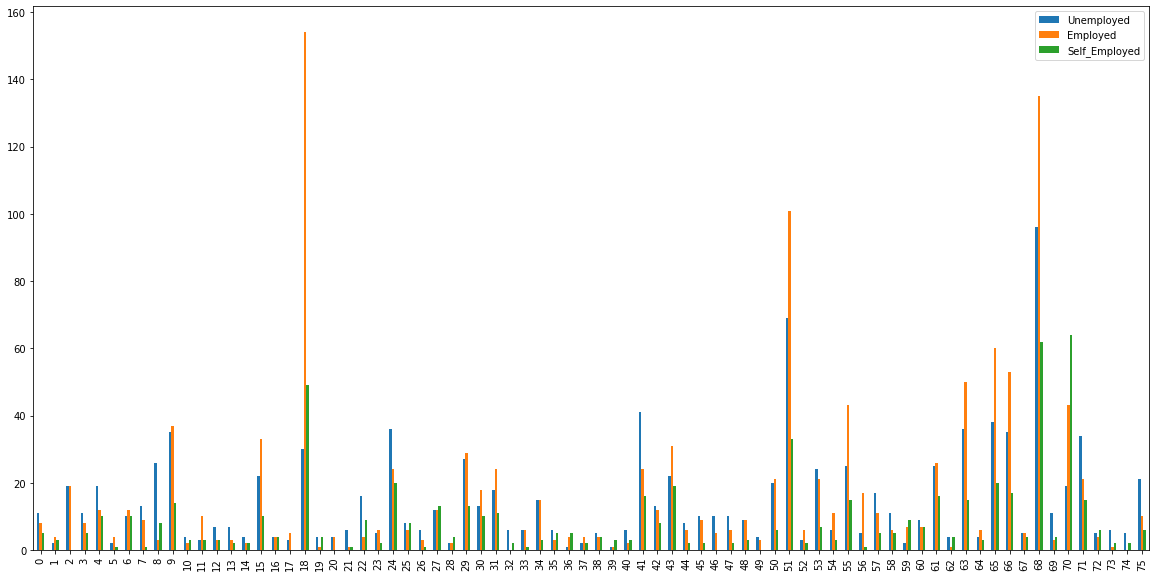

In [49]:

dff111 = dff111.head(80)
dff111.plot(kind='bar',figsize=(20,10))
plt.show()

In [50]:
df1.head(2)

,Time,Gender,Grad_Y,Course,School,Highest_Q,Current_Stat,No_Of_Jobs,NYSC_cert,NYSC_Year,...,Currency,Job_Hours,Most_Important_Qualification,Findout_Job,Worked_For_Employer,Transport_TW,Rent_Buy,CP_Job,CP_Further_Studies,Skills_Prepared
0,2/8/2018 9:05:23,Male,2013,Electrical & Electronic Engineering,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),3,NaN,NaN,...,Naira,8.0,No one thing was important,Internship,No,Bus,Yes: From my first job,No,No,"Critical thinking skills, Ability to solve com..."
1,2/15/2018 12:11:32,Male,2014,Psychology,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),2,Yes,2017.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,Internship,No,BRT,No: From my current job,Strongly Disagree,Agree,"Critical thinking skills, Ability to solve com..."


SO we can see the information of schools with their graduates who has finished NYSC,and are either employed,

not employed or self employed...

from the information above...we can get somethings from the dataset,which are very important..................................











(ONE HOT ENCODE OR PD.GET DUMMIES)

Lets lable encode the categorical variable..,i.e covert our categorical variable to  numerical variable,but first

we want to check the columns that would be encoded!!!OR

we can actually use our pd.get dummies function...but which ever way its..we are only trying to convert our 

categorical to numerical......

In [51]:
#Some label encoding since we have some categorical DATA
obj_cols = [col for col in df1.columns if df1[col].dtype=='object']
print('Columns that will be encoded are ='+str(obj_cols))

Columns that will be encoded are =['Time', 'Gender', 'Course', 'School', 'Highest_Q', 'Current_Stat', 'NYSC_cert', 'Through_NYSC', 'FJob_Level', 'FJob_Role', 'FJob_sector', 'FJ_Income_Level', 'FJ_Required_HQ', 'Reason_FJ', 'PJ_level', 'PJ_Role', 'PJ_Sector', 'PJ_Income', 'PJ_Required_HQ', 'Reason_PJ', 'Best_Employer', 'Reason_Best_Employer', 'Most_PS', 'Currency', 'Most_Important_Qualification', 'Findout_Job', 'Worked_For_Employer', 'Transport_TW', 'Rent_Buy', 'CP_Job', 'CP_Further_Studies', 'Skills_Prepared']


In [52]:
df2 = pd.get_dummies(df1,drop_first = True)
df2 
col_list = df1.columns.tolist()


In [53]:
df2 = pd.get_dummies(df2)
df2 = df2.reindex(columns = col_list).fillna(0.00)
#dealing with the dummy trap and also filling the empty columns
df2.head()

,Time,Gender,Grad_Y,Course,School,Highest_Q,Current_Stat,No_Of_Jobs,NYSC_cert,NYSC_Year,...,Currency,Job_Hours,Most_Important_Qualification,Findout_Job,Worked_For_Employer,Transport_TW,Rent_Buy,CP_Job,CP_Further_Studies,Skills_Prepared
0,0.0,0.0,2013,0.0,0.0,0.0,0.0,3,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2014,0.0,0.0,0.0,0.0,2,0.0,2017.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2013,0.0,0.0,0.0,0.0,2,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2017,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2013,0.0,0.0,0.0,0.0,3,0.0,2016.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


lets find the best features of the dataset according to the heatmap

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif
X = df2.drop('No_Of_Jobs', axis = 1)
y = df2.No_Of_Jobs

selector = SelectKBest(score_func=f_classif, k=5)
fitted = selector.fit(X, y)
features_scores = pd.DataFrame(fitted.scores_)
features_columns = pd.DataFrame(X.columns)

best_features = pd.concat([features_columns, features_scores], axis=1)
best_features.columns = ['Feature', 'Score']
best_features.sort_values(by='Score', ascending=False, inplace=True)
best_features.head()

C:\Users\user\anaconda3\New folder\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 0  1  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 27 28 29 30 31 32 33 34] are constant.
  UserWarning)
C:\Users\user\anaconda3\New folder\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Feature,Score
26,Job_Hours,2309.007654
2,Grad_Y,55.464395
8,NYSC_Year,12.176879
0,Time,NaN
1,Gender,NaN


LETS SPLIT OUR DATA...with all convinience...

our test is 33%..so that means our train is 67%

in as much,as  most people might say am going into details,its for those who dont understand step by step measures

In [56]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train.head()

,Time,Gender,Grad_Y,Course,School,Highest_Q,Current_Stat,NYSC_cert,NYSC_Year,Through_NYSC,...,Currency,Job_Hours,Most_Important_Qualification,Findout_Job,Worked_For_Employer,Transport_TW,Rent_Buy,CP_Job,CP_Further_Studies,Skills_Prepared
1999,0.0,0.0,2014,0.0,0.0,0.0,0.0,0.0,2015.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4222,0.0,0.0,2013,0.0,0.0,0.0,0.0,0.0,2014.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5161,0.0,0.0,2015,0.0,0.0,0.0,0.0,0.0,2016.0,0.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3738,0.0,0.0,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2480,0.0,0.0,2013,0.0,0.0,0.0,0.0,0.0,2014.0,0.0,...,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


scale data

In [59]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

type(X_train), type(X_test)

(numpy.ndarray, numpy.ndarray)


MODEL

Apply linear regression on our data

In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#fitting multiple linear regression to the training set

y_pred = regressor.predict(X_test)#predicting the test set results

print(regressor.intercept_, regressor.coef_)#getting the intercept and coefficient
print(mean_squared_error(y_test, y_pred))#

1.1390160183066484 [ 6.77905529e+11  3.22834605e+13 -1.75781250e-01  7.12117557e+11
  3.23622140e+11 -4.28809972e+12 -2.21335586e+12 -6.99610907e+11
 -3.51562500e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.16796875e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
0.8010160773352275


In [66]:
#calculating the r squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4298227083446029

Apply support vector regression to our data also

In [61]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
regressor = SVR(C=0.5)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.7503301519815243


Apply KMeans also on our data....

In [62]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=2)
clustering.fit(X_train, y_train)

y_pred = clustering.predict(X_test)
print(mean_squared_error(y_test, y_pred))

2.575159605339524


we actually applying all this models for the purpose of getting the best for our dataset prediction.....


Ater pplying  different models...to our datatset

1.LINEAR REGRESSSION

2.SUPPORT VECTOR REGRESSION

3.KMEANS



AFTER thorough evaluation

i think we would go with the support vector regression model and also the linear regression model, because the

r2_squared is perfect for the linear regression model and the mean squared error for the support vector regresion 


is also fine,but the one that would be better will be the linear regression model


SO,i believe this model can be deployed for production

Thanks for viewing!!!!!!